<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#I.-Data" data-toc-modified-id="I.-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>I. Data</a></span></li><li><span><a href="#II.-Test" data-toc-modified-id="II.-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>II. Test</a></span></li><li><span><a href="#III.-Variables" data-toc-modified-id="III.-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>III. Variables</a></span><ul class="toc-item"><li><span><a href="#156-Change-in-lifestyle" data-toc-modified-id="156-Change-in-lifestyle-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>156 Change in lifestyle</a></span></li><li><span><a href="#100-Village,-City,-or-Town" data-toc-modified-id="100-Village,-City,-or-Town-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>100 Village, City, or Town</a></span></li><li><span><a href="#203.-Reason-for-Location" data-toc-modified-id="203.-Reason-for-Location-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>203. Reason for Location</a></span></li><li><span><a href="#303.-Current-Employment-Status" data-toc-modified-id="303.-Current-Employment-Status-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>303. Current Employment Status</a></span></li><li><span><a href="#310-Send-Money" data-toc-modified-id="310-Send-Money-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>310 Send Money</a></span></li><li><span><a href="#334-Optimism" data-toc-modified-id="334-Optimism-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>334 Optimism</a></span></li><li><span><a href="#700-Stay-or-go" data-toc-modified-id="700-Stay-or-go-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>700 Stay or go</a></span></li><li><span><a href="#226-COVID-Impact-on-Mobility" data-toc-modified-id="226-COVID-Impact-on-Mobility-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>226 COVID Impact on Mobility</a></span></li></ul></li></ul></div>

*Last Updated: 2023.09.25, Will Cao (wpc2106@columbia.edu)*

**Notes:** \
These were quick, non-presentation visualization to identify general trends. \
Conclusions were outlined in the document on GDrive:

**Used in:**
* [**04_analysis > 230912_brainstorm_sketch_meeting > 230912_charts**](https://docs.google.com/document/d/1ab9bcfrNpGMqzBnjeG0QZHGfXWQ2h8NnbVS4ik9dbmo/edit?usp=sharing)

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

# import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

# I. Data

In [3]:
# original survey data
survey_ = pd.read_csv('data_raw/raw_survey/210615_raw_survey.csv')
survey = survey_.copy()

# check for any potential row-wise errors
print('\nDuplicate rows?:')
print(survey.duplicated().value_counts())

print('\nUnique SITE_CODE column?:')
print(survey['SITE_CODE'].is_unique)

# duplicate the respondent ID column and set it as the index
survey['ID'] = survey['SITE_CODE']
survey = survey.set_index('ID')

# check if the uniqueness was maintained
print('\nUnique ID index?:')
print(survey.index.is_unique)

survey


Duplicate rows?:
False    1644
Name: count, dtype: int64

Unique SITE_CODE column?:
True

Unique ID index?:
True


,SITE_CODE,TARGET_LATITUDE,TARGET_LONGITUDE,SITE_LATITUDE,SITE_LONGITUDE,SURVEY DURATION IN MINUTES,DATE_UPLOADED,3 Migrant,4 Gender,4 Other Gender,...,236 Current Residence,Migrant Quota Category,237 Returned,238 Places Returned To,Unnamed: 326,Unnamed: 327,Unnamed: 328,Unnamed: 329,Unnamed: 330,Unnamed: 331
ID,,,,,,,,,,,,,,,,,,,,,
276785,276785,-1.21003,36.78920,-1.28892,36.80449,139.96,3/4/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
276788,276788,-1.21010,36.78923,-1.28872,36.80430,74.59,3/4/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
276802,276802,-1.21010,36.78923,-1.28884,36.80433,244.90,3/5/21,Yes,Male,-1,...,One year exactly or/More than a year,New Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
276814,276814,-1.20987,36.78899,-1.28885,36.80435,125.87,3/4/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,Nakuru^1^~Kisumu^2^,NaN,NaN,NaN,NaN,NaN,NaN
276822,276822,-1.20976,36.78888,-1.28873,36.80428,80.18,3/4/21,Yes,Female,-1,...,One year exactly or/More than a year,New Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,297661,-26.18491,28.05547,-26.18380,28.05302,62.78,4/16/21,Yes,Female,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
297663,297663,-26.18395,28.05459,-26.18328,28.05690,73.30,4/16/21,No,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
297666,297666,-26.18565,28.05295,-26.18387,28.05308,72.04,4/16/21,No,Male,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,Yeoville^4^~Bloemfontein^2^,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
traj_ = pd.read_csv("C:/Users/willy/python/mobilities-narratives/data_gen/trajectories/trajectories.csv")
traj = traj_.copy()

traj = traj.set_index('Unnamed: 0')
# traj = traj.dropna(subset=['duration', 'interval', 'location_name'], how='all')
traj

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
276785.00,276785,1996,25,0.0,204.0,"('Kawango', 'Kisumu', 'Kenya')",origin,"(0.0, 31.983333000000002)",0.000000,0.000000,...,-3,NaN,No,-1,0.000000,0.000000,0.000000,0.000000,0.000000,31.983333
276785.01,276785,1996,25,204.0,48.0,"('Manyatta', 'Kisumu', 'Kenya')",1st migration location,"(0.33330859999999995, 34.4813935)",280.512936,280.512936,...,-3,NaN,No,-1,280.512936,280.232139,280.512936,280.232139,0.333309,34.481394
276785.02,276785,1996,25,252.0,51.0,"('Kawangware', 'Nairobi', 'Kenya')",2nd migration location,"(-1.2784631000000002, 36.751643)",549.265452,309.229771,...,-3,NaN,No,-1,309.229771,309.576982,549.265452,548.896968,-1.278463,36.751643
276785.03,276785,1996,25,NaN,NaN,NaN,3rd migration location,NaN,NaN,NaN,...,-3,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
276785.04,276785,1996,25,NaN,NaN,NaN,4th migration location,NaN,NaN,NaN,...,-3,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297668.06,297668,1991,30,380.0,16.0,"('Berea', 'Johannesburg', 'South Africa')",current location,"(-26.1822222, 28.0533333)",1254.648626,0.000000,...,Hr Specialist,2000.0,Yes,0,0.000000,0.000000,1254.648626,1255.233886,-26.182222,28.053333
297668.07,297668,1991,30,386.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,Hr Specialist,2000.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
297668.08,297668,1991,30,404.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,Hr Specialist,2000.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
orig = traj[traj['location_type'].eq('origin')].reset_index().drop(columns=['Unnamed: 0']).set_index('respondentID')
display(orig)

curL = traj[traj['location_type'].eq('current location') & traj['interval'].eq(0.0)].reset_index().drop(columns=['Unnamed: 0']).set_index('respondentID')
display(curL)

,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,distance_from_properties_owned_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
respondentID,,,,,,,,,,,,,,,,,,,,,
276785,1996,25,0.0,204.0,"('Kawango', 'Kisumu', 'Kenya')",origin,"(0.0, 31.983333000000002)",0.0,0.0,NaN,...,-3,NaN,No,-1,0.0,0.0,0.0,0.0,0.000000,31.983333
276802,1994,27,0.0,56.0,"('Machakos', 'Machakos', 'Kenya')",origin,"(-1.27900465, 37.39526976452546)",0.0,0.0,NaN,...,Accountant,3000.0,No,-1,0.0,0.0,0.0,0.0,-1.279005,37.395270
276814,1988,33,0.0,300.0,"('Wathorego', 'Kisumu', 'Kenya')",origin,"(51.52066515, -0.14577657494447913)",0.0,0.0,NaN,...,-3,NaN,Yes,1,0.0,0.0,0.0,0.0,51.520665,-0.145777
276822,1995,26,0.0,246.0,"('Kawango', 'Maseno', 'Kenya')",origin,"(0.0, 31.983333000000002)",0.0,0.0,NaN,...,Teaching,10000.0,No,-1,0.0,0.0,0.0,0.0,0.000000,31.983333
276931,1988,33,0.0,301.0,"('Mamboleo', 'Kisumu', 'Kenya')",origin,"(-0.05541535, 34.78619684046177)",0.0,0.0,NaN,...,Teaching,500.0,Yes,2,0.0,0.0,0.0,0.0,-0.055415,34.786197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297657,1978,43,0.0,650.0,"('Chingola', 'Chingola', 'Zambia')",origin,"(-12.5474926, 27.860042200000002)",0.0,0.0,NaN,...,He Said He Like Working With His Hands So He D...,500.0,No,-1,0.0,0.0,0.0,0.0,-12.547493,27.860042
297663,1979,42,NaN,NaN,"('Sesambo', 'Sesambo', 'Uganda')",origin,NaN,NaN,NaN,NaN,...,Soldier,NaN,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN
297666,1984,37,0.0,372.0,"('Lububamshi', 'Katsanga', 'Democratic Republi...",origin,"(-29.116395, 26.215496)",0.0,0.0,NaN,...,Psychologist,1500.0,Yes,0,0.0,0.0,0.0,0.0,-29.116395,26.215496


,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,distance_from_properties_owned_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
respondentID,,,,,,,,,,,,,,,,,,,,,
276785,1996,25,303.0,0.0,"('Kawangware', 'Nairobi', 'Kenya')",current location,"(-1.2784631000000002, 36.751643)",549.265452,0.000000,NaN,...,-3,NaN,No,-1,0.000000,0.000000,549.265452,548.896968,-1.278463,36.751643
276802,1994,27,64.0,0.0,"('Kawangware', 'Nairobi', 'Kenya')",current location,"(-1.2784631000000002, 36.751643)",71.630505,24.717927,NaN,...,Accountant,3000.0,No,-1,24.717927,24.690264,71.630505,71.550334,-1.278463,36.751643
276814,1988,33,319.0,0.0,"('Kayole', 'Nairobi', 'Kenya')",current location,"(-1.2659842, 36.916945500000004)",6810.632065,191.121340,NaN,...,-3,NaN,Yes,1,191.121340,191.428415,6810.632065,6824.346017,-1.265984,36.916945
276822,1995,26,249.0,0.0,"('Kayole', 'Nairobi', 'Kenya')",current location,"(-1.2659842, 36.916945500000004)",566.723692,190.235284,NaN,...,Teaching,10000.0,No,-1,190.235284,190.484877,566.723692,566.323505,-1.265984,36.916945
276931,1988,33,301.0,0.0,"('Kawangware', 'Nairobi', 'Kenya')",current location,"(-1.2784631000000002, 36.751643)",257.198700,257.198700,NaN,...,Teaching,500.0,Yes,2,257.198700,257.390902,257.198700,257.390902,-1.278463,36.751643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297657,1978,43,1034.0,0.0,"('Berea', 'Johannesburg', 'South Africa')",current location,"(-26.1822222, 28.0533333)",1509.508024,0.000000,NaN,...,He Said He Like Working With His Hands So He D...,500.0,No,-1,0.000000,0.000000,1509.508024,1516.249611,-26.182222,28.053333
297663,1979,42,0.0,0.0,"('Berea', 'Johannesburg', 'South Africa')",current location,"(-26.1822222, 28.0533333)",0.000000,0.000000,NaN,...,Soldier,NaN,Yes,1,0.000000,0.000000,0.000000,0.000000,-26.182222,28.053333
297666,1984,37,404.0,0.0,"('Berea', 'Johannesburg', 'South Africa')",current location,"(-26.1822222, 28.0533333)",372.285757,0.000000,NaN,...,Psychologist,1500.0,Yes,0,0.000000,0.000000,372.285757,373.101076,-26.182222,28.053333


# II. Test

In [ ]:
survey[['156 Change in lifestyle', '303 Current Employment Status']]

In [ ]:
sns.countplot(y='303 Current Employment Status',
              hue='156 Change in lifestyle',
              data=survey,
              orient='h')

In [ ]:
V = ['156 Change in lifestyle', '303 Current Employment Status']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count()

counts.plot(kind='bar',
           stacked=True)

In [ ]:
V = ['156 Change in lifestyle', '303 Current Employment Status']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)

display(counts)

counts.plot(kind='barh', stacked=True, color=['grey', 'darkgrey', 'red', 'gold', 'green'],
            figsize=(8.5,5))

In [ ]:
V = ['100: Village, City or Town', '706 Plans to move']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)

display(counts)

counts.plot(kind='barh', stacked=True, color=['darkblue', 'blue', 'lightblue'],
            figsize=(8.5,5))

In [3]:
def sbar(variables, palette):
    V = variables
    P = palette

    subset = survey[V]
    subset.loc[:, 'count'] = 1
    counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)

    display(counts)

    counts.plot(kind='barh', stacked=True, color=P,
                figsize=(8.5,5))

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

* https://seaborn.pydata.org/tutorial/function_overview.html
* https://seaborn.pydata.org/generated/seaborn.barplot.html


# III. Variables

## 156 Change in lifestyle

156 Change in lifestyle,-3,DK/RA,No,Remain the same,Yes
303 Current Employment Status,,,,,
-1,1.0,0.0,1.0,0.0,1.0
-3,0.0,0.0,1.0,0.0,1.0
Casual employment/temporary worker,0.0,2.0,51.0,14.0,22.0
Doing casual jobs,0.0,3.0,72.0,22.0,17.0
Housewife/homemaker,0.0,0.0,15.0,5.0,5.0
Other,0.0,9.0,41.0,28.0,9.0
Self-employed (run small business/income generation project),0.0,8.0,372.0,120.0,87.0
Unemployed,0.0,6.0,176.0,68.0,75.0
University/technikon/correspondence student,0.0,1.0,48.0,9.0,4.0


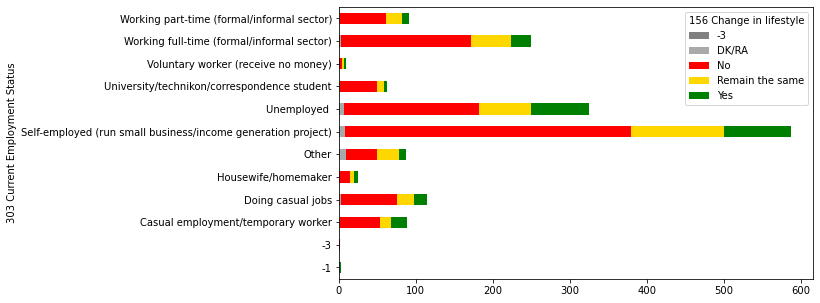

In [7]:
sbar(['156 Change in lifestyle', '303 Current Employment Status'], ['grey', 'darkgrey', 'red', 'gold', 'green'])

## 100 Village, City, or Town

In [8]:
survey[['100: Village, City or Town', '8 Identify City ', '700 Stay or go', '706 Plans to move']]

,"100: Village, City or Town",8 Identify City,700 Stay or go,706 Plans to move
ID,,,,
276785,Town,Nairobi,-1,-1
276788,Village,Nairobi,-1,-1
276802,Town,Nairobi,Stay in country but move to another neighbourhood,No
276814,Village,Nairobi,-1,-1
276822,City,Nairobi,-1,-1
...,...,...,...,...
297661,City,Johannesburg,Stay in country but move to another neighbourhood,No
297663,Village,Johannesburg,Stay here in neighbourhood,No
297666,Village,Johannesburg,Stay here in neighbourhood,No


"100: Village, City or Town",City,Town,Village
8 Identify City,,,
Accra,135,339,107
Johannesburg,125,182,208
Nairobi,29,121,398


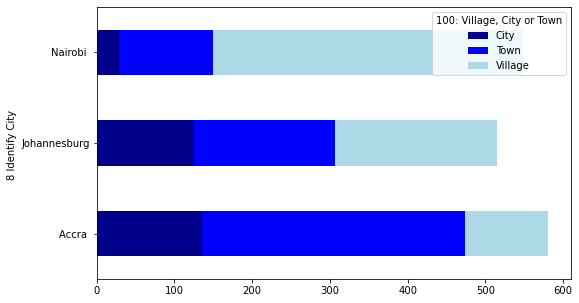

In [9]:
sbar(['100: Village, City or Town', '8 Identify City '], ['darkblue', 'blue', 'lightblue'])

"100: Village, City or Town",City,Town,Village
700 Stay or go,,,
-1,9,10,12
Leave the country,48,129,98
Stay here in neighbourhood,166,343,486
Stay in country but move to another neighbourhood,66,160,117


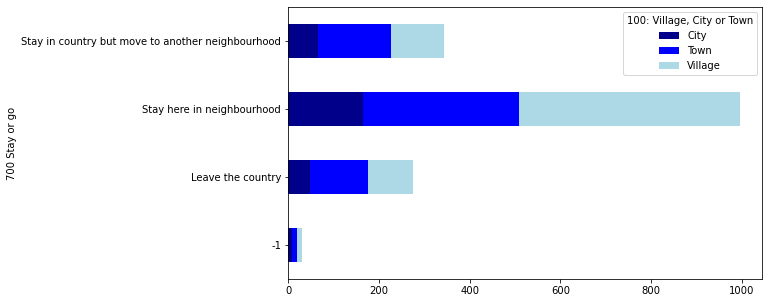

In [10]:
sbar(['100: Village, City or Town', '700 Stay or go'], ['darkblue', 'blue', 'lightblue'])

"100: Village, City or Town",City,Town,Village
706 Plans to move,,,
-1,9,10,12
Dk/Ra,11,12,44
No,253,582,630
Yes,16,38,27


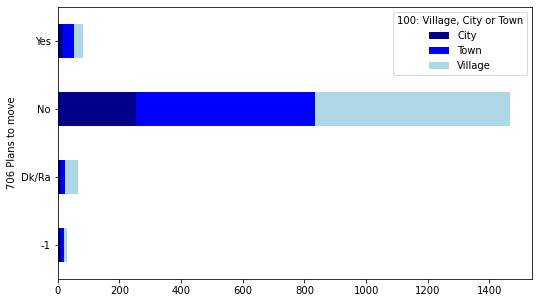

In [11]:
sbar(['100: Village, City or Town', '706 Plans to move'], ['darkblue', 'blue', 'lightblue'])

## 203. Reason for Location

In [12]:
survey[['203a Reason for Location', '205b Reason for leaving', '300 Means to Generate Income', '303 Current Employment Status', '307 Kind of Work']]

,203a Reason for Location,205b Reason for leaving,300 Means to Generate Income,303 Current Employment Status,307 Kind of Work
ID,,,,,
276785,Access to work,-1,-3,-3,-3
276788,-3,-3,-1,-1,-1
276802,-1,-1,Teacher,Doing casual jobs,-3
276814,Family reasons (unification / escape),Access to work,Hawker (no fixed location),Doing casual jobs,-3
276822,Access to work,-1,Teacher,Working part-time (formal/informal sector),-3
...,...,...,...,...,...
297661,-1,-1,DK/RA,University/technikon/correspondence student,University/technikon/correspondence student
297663,-1,-1,Not working,Self-employed (run small business/income gener...,Self-employed (run small business/income gener...
297666,Other,Access to work,Hawker (no fixed location),Working full-time (formal/informal sector),Working full-time (formal/informal sector)


203a Reason for Location,-1,-3,Access to work,Cost of rent (too high& somewhere else much cheaper),Crime or insecurity,Cultural reasons (language& to be close to other countrymen),DK/RA,Education (for self or others),Evicted,Family reasons (unification / escape),Needed more space,Other,Place no longer available,Political reason
205b Reason for leaving,,,,,,,,,,,,,,
-1,819.0,0.0,318.0,29.0,6.0,0.0,0.0,33.0,4.0,98.0,16.0,26.0,2.0,4.0
-3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Access to work,0.0,0.0,84.0,2.0,1.0,1.0,0.0,19.0,1.0,25.0,1.0,11.0,0.0,1.0
Cost of rent (too high& somewhere else much cheaper),0.0,0.0,9.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
Crime or insecurity,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DK/RA,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Education (for self or others),0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,0.0,2.0,1.0,1.0,0.0,0.0
Evicted,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Family reasons (unification / escape),0.0,0.0,8.0,0.0,0.0,0.0,1.0,7.0,1.0,26.0,1.0,1.0,0.0,0.0


<AxesSubplot:ylabel='205b Reason for leaving'>

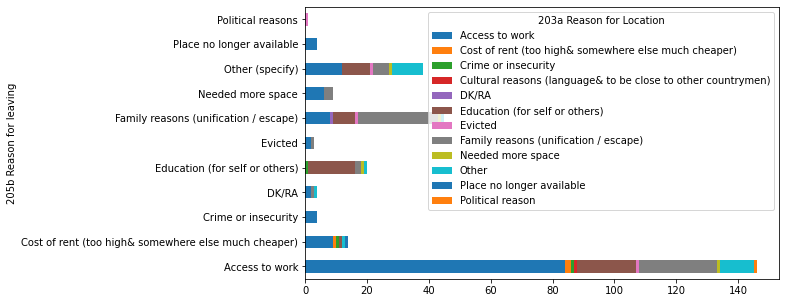

In [24]:
V = ['203a Reason for Location', '205b Reason for leaving']

# group and pivot table
subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

# remove missing data
counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

203a Reason for Location,-1,-3,Access to work,Cost of rent (too high& somewhere else much cheaper),Crime or insecurity,Cultural reasons (language& to be close to other countrymen),DK/RA,Education (for self or others),Evicted,Family reasons (unification / escape),Needed more space,Other,Place no longer available,Political reason
300 Means to Generate Income,,,,,,,,,,,,,,
-1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agricultural Labourer,26.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0
Car Guard,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Construction,36.0,0.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0,1.0,0.0,1.0
DK/RA,80.0,0.0,5.0,0.0,0.0,0.0,1.0,5.0,0.0,3.0,0.0,1.0,0.0,0.0
Doctor,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Domestic Worker/Caretaker/Custodian,43.0,0.0,38.0,2.0,0.0,0.0,0.0,1.0,1.0,8.0,1.0,2.0,0.0,0.0
Driver,19.0,0.0,19.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


<AxesSubplot:ylabel='300 Means to Generate Income'>

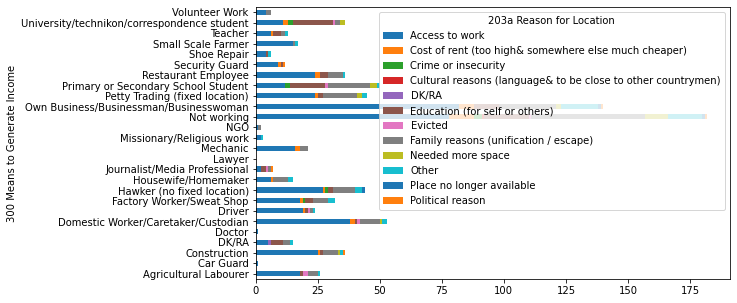

In [26]:
V = ['203a Reason for Location', '300 Means to Generate Income']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

203a Reason for Location,-1,-3,Access to work,Cost of rent (too high& somewhere else much cheaper),Crime or insecurity,Cultural reasons (language& to be close to other countrymen),DK/RA,Education (for self or others),Evicted,Family reasons (unification / escape),Needed more space,Other,Place no longer available,Political reason
303 Current Employment Status,,,,,,,,,,,,,,
-1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Casual employment/temporary worker,42.0,0.0,30.0,3.0,0.0,0.0,0.0,4.0,0.0,9.0,1.0,0.0,0.0,0.0
Doing casual jobs,54.0,0.0,38.0,2.0,0.0,0.0,0.0,5.0,0.0,12.0,0.0,3.0,0.0,0.0
Housewife/homemaker,10.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,4.0,0.0,0.0
Other,63.0,0.0,12.0,0.0,1.0,0.0,0.0,2.0,0.0,6.0,0.0,3.0,0.0,0.0
Self-employed (run small business/income generation project),263.0,0.0,176.0,11.0,2.0,1.0,0.0,21.0,3.0,68.0,6.0,31.0,3.0,2.0
Unemployed,178.0,0.0,67.0,7.0,2.0,0.0,0.0,19.0,5.0,31.0,10.0,5.0,0.0,1.0
University/technikon/correspondence student,37.0,0.0,1.0,2.0,0.0,0.0,0.0,17.0,0.0,5.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='303 Current Employment Status'>

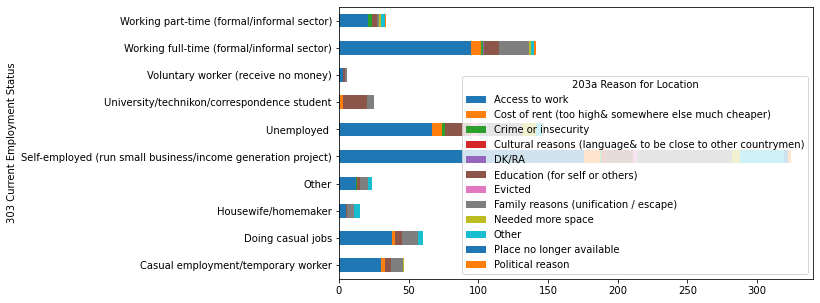

In [25]:
V = ['203a Reason for Location', '303 Current Employment Status']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

203a Reason for Location,-1,-3,Access to work,Cost of rent (too high& somewhere else much cheaper),Crime or insecurity,Cultural reasons (language& to be close to other countrymen),DK/RA,Education (for self or others),Evicted,Family reasons (unification / escape),Needed more space,Other,Place no longer available,Political reason
307 Kind of Work,,,,,,,,,,,,,,
-1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,17.0,0.0,6.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
Casual employment/temporary worker,48.0,0.0,29.0,3.0,0.0,0.0,0.0,5.0,0.0,8.0,1.0,1.0,0.0,0.0
Doing casual jobs,46.0,0.0,36.0,2.0,0.0,0.0,0.0,5.0,0.0,11.0,0.0,2.0,0.0,0.0
Housewife/homemaker,9.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,4.0,0.0,0.0
Other (specify),53.0,0.0,15.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,1.0,0.0,0.0
Self-employed (run small business/income generation project),268.0,0.0,178.0,11.0,2.0,1.0,0.0,21.0,3.0,67.0,6.0,32.0,3.0,3.0
Unemployed,170.0,0.0,61.0,7.0,1.0,0.0,0.0,18.0,4.0,27.0,10.0,6.0,0.0,0.0
University/technikon/correspondence student,39.0,0.0,1.0,1.0,2.0,0.0,0.0,16.0,0.0,5.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='307 Kind of Work'>

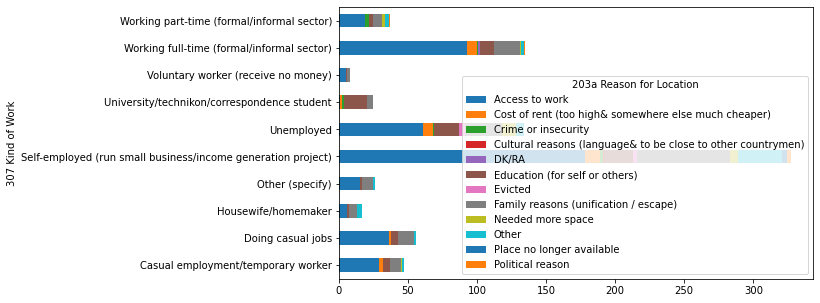

In [27]:
V = ['203a Reason for Location', '307 Kind of Work']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

## 303. Current Employment Status

In [ ]:
survey[['303 Current Employment Status', '205b Reason for leaving', ]]

303 Current Employment Status,-1,-3,Casual employment/temporary worker,Doing casual jobs,Housewife/homemaker,Other,Self-employed (run small business/income generation project),Unemployed,University/technikon/correspondence student,Voluntary worker (receive no money),Working full-time (formal/informal sector),Working part-time (formal/informal sector)
205b Reason for leaving,,,,,,,,,,,,
-1,2.0,2.0,76.0,90.0,21.0,82.0,457.0,280.0,50.0,8.0,204.0,83.0
-3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Access to work,0.0,0.0,8.0,13.0,1.0,2.0,64.0,23.0,2.0,0.0,29.0,4.0
Cost of rent (too high& somewhere else much cheaper),0.0,0.0,0.0,2.0,0.0,0.0,6.0,1.0,0.0,0.0,5.0,0.0
Crime or insecurity,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
DK/RA,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Education (for self or others),0.0,0.0,2.0,0.0,0.0,1.0,7.0,2.0,4.0,1.0,2.0,1.0
Evicted,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Family reasons (unification / escape),0.0,0.0,1.0,4.0,2.0,0.0,17.0,11.0,3.0,0.0,5.0,2.0


<AxesSubplot:ylabel='205b Reason for leaving'>

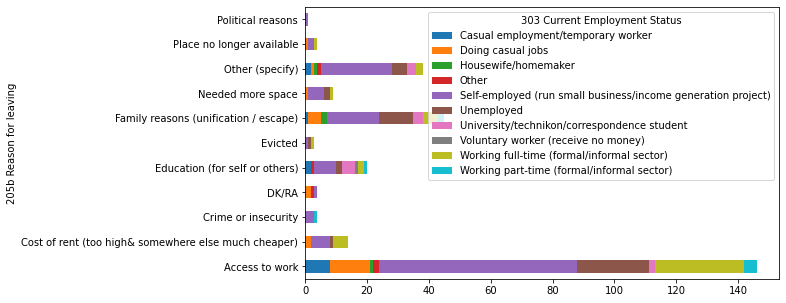

In [28]:
V = ['303 Current Employment Status', '205b Reason for leaving']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

303 Current Employment Status,-1,-3,Casual employment/temporary worker,Doing casual jobs,Housewife/homemaker,Other,Self-employed (run small business/income generation project),Unemployed,University/technikon/correspondence student,Voluntary worker (receive no money),Working full-time (formal/informal sector),Working part-time (formal/informal sector)
300 Means to Generate Income,,,,,,,,,,,,
-1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agricultural Labourer,0.0,0.0,6.0,13.0,0.0,0.0,24.0,5.0,0.0,0.0,4.0,0.0
Car Guard,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Construction,0.0,0.0,8.0,7.0,0.0,1.0,14.0,11.0,1.0,0.0,20.0,10.0
DK/RA,0.0,0.0,6.0,7.0,1.0,4.0,34.0,12.0,9.0,1.0,14.0,7.0
Doctor,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0
Domestic Worker/Caretaker/Custodian,0.0,0.0,9.0,16.0,2.0,2.0,19.0,12.0,0.0,0.0,21.0,15.0
Driver,0.0,0.0,4.0,1.0,0.0,10.0,8.0,5.0,0.0,0.0,12.0,3.0


<AxesSubplot:ylabel='300 Means to Generate Income'>

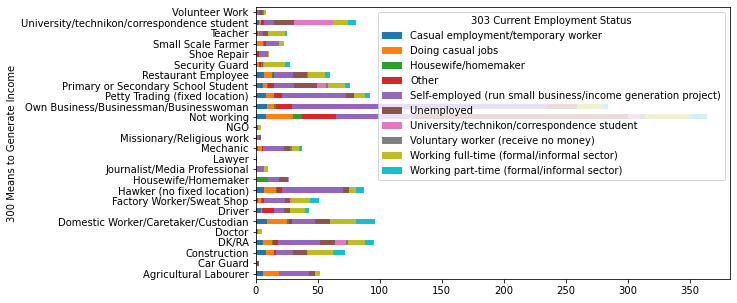

In [29]:
V = ['303 Current Employment Status', '300 Means to Generate Income']

subset = survey[V]
subset['count'] = 1

counts_ = subset.groupby(V).count().reset_index()
counts_ = counts_[]

counts = .pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

,301 Economic Activity,303 Current Employment Status,count
408,Na,60,60
16,99,57,57
2,-3,54,54
425,Not Working,44,44
708,Unemployed,35,35
51,Business,30,30
475,Petty Trading,26,26
388,Mechanic,25,25
218,Hawking,25,25
454,Own Business,24,24


,303 Current Employment Status,301 Economic Activity,count
ID,,,
276785,-3,-3,1
276788,-1,Other Activity,1
276802,Doing casual jobs,Other Activity,1
276814,Doing casual jobs,Other Activity,1
276822,Working part-time (formal/informal sector),Teaching,1
...,...,...,...
297661,University/technikon/correspondence student,Other Activity,1
297663,Self-employed (run small business/income gener...,Other Activity,1
297666,Working full-time (formal/informal sector),Other Activity,1


303 Current Employment Status,-1,-3,Casual employment/temporary worker,Doing casual jobs,Housewife/homemaker,Other,Self-employed (run small business/income generation project),Unemployed,University/technikon/correspondence student,Voluntary worker (receive no money),Working full-time (formal/informal sector),Working part-time (formal/informal sector)
301 Economic Activity,,,,,,,,,,,,
-3,0.0,1.0,2.0,1.0,0.0,0.0,9.0,20.0,4.0,0.0,12.0,5.0
99,0.0,0.0,1.0,1.0,1.0,2.0,3.0,32.0,6.0,1.0,7.0,3.0
Business,0.0,0.0,0.0,1.0,0.0,0.0,22.0,6.0,0.0,0.0,1.0,0.0
Construction,0.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
Domestic Worker,0.0,0.0,0.0,4.0,0.0,0.0,5.0,2.0,0.0,0.0,3.0,4.0
Driving,0.0,0.0,1.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,7.0,0.0
Hawker,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,2.0
Hawking,0.0,0.0,3.0,4.0,0.0,1.0,14.0,3.0,0.0,0.0,0.0,0.0
Mechanic,0.0,0.0,2.0,1.0,0.0,1.0,7.0,2.0,0.0,1.0,9.0,2.0


<AxesSubplot:ylabel='301 Economic Activity '>

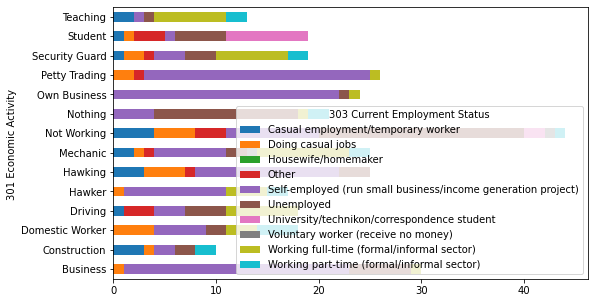

In [60]:
V = ['303 Current Employment Status', '301 Economic Activity ']

subset = survey[V]
subset['count'] = 1

categories = subset.groupby(V[1]).count().reset_index().sort_values(by='count', ascending=False)

display(categories.head(20))

# find top categories
topcats = ['Na', '99', '-3', 'Not Working', 'Business', 'Petty Trading', 'Mechanic', 'Hawking', 'Own Business', 'Nothing', 'Security Guard', 'Student', 'Driving', 'Domestic Worker', 'Hawker', 'Teaching', 'Construction']

# replace all lesser categories
subset.loc[~(subset['301 Economic Activity '].isin(topcats)), '301 Economic Activity '] = 'Other Activity'
display(subset)
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['99', '-3', 'Na', 'Other Activity'])


counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

303 Current Employment Status,-1,-3,Casual employment/temporary worker,Doing casual jobs,Housewife/homemaker,Other,Self-employed (run small business/income generation project),Unemployed,University/technikon/correspondence student,Voluntary worker (receive no money),Working full-time (formal/informal sector),Working part-time (formal/informal sector)
307 Kind of Work,,,,,,,,,,,,
-1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3,0.0,2.0,2.0,7.0,0.0,1.0,7.0,3.0,1.0,0.0,3.0,3.0
Casual employment/temporary worker,0.0,0.0,74.0,15.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0
Doing casual jobs,0.0,0.0,8.0,87.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0
Housewife/homemaker,0.0,0.0,0.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Other (specify),0.0,0.0,1.0,1.0,1.0,55.0,11.0,7.0,0.0,0.0,3.0,0.0
Self-employed (run small business/income generation project),0.0,0.0,0.0,2.0,0.0,15.0,559.0,15.0,0.0,0.0,2.0,2.0
Unemployed,0.0,0.0,0.0,1.0,0.0,4.0,3.0,293.0,2.0,0.0,0.0,1.0
University/technikon/correspondence student,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,59.0,0.0,0.0,0.0


<AxesSubplot:ylabel='307 Kind of Work'>

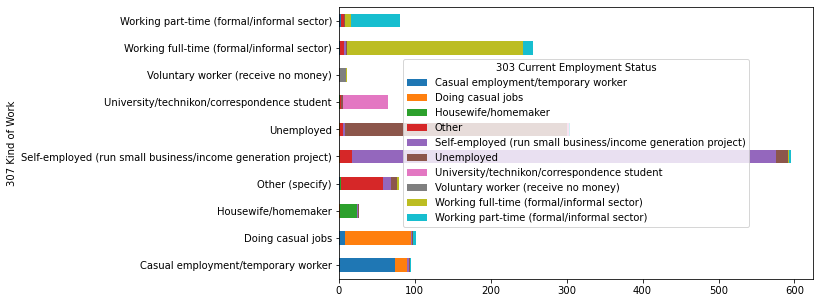

In [30]:
V = ['303 Current Employment Status', '307 Kind of Work']

subset = survey[V]
subset['count'] = 1
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

In [ ]:
V = ['300 Means to Generate Income', '301 Economic Activity ']

subset = survey[V]
subset['count'] = 1

categories = subset.groupby(V[1]).count().reset_index().sort_values(by='count', ascending=False)

display(categories.head(20))

# find top categories
topcats = ['Na', '99', '-3', 'Not Working', 'Business', 'Petty Trading', 'Mechanic', 'Hawking', 'Own Business', 'Nothing', 'Security Guard', 'Student', 'Driving', 'Domestic Worker', 'Hawker', 'Teaching', 'Construction']

# replace all lesser categories
subset.loc[~(subset['301 Economic Activity '].isin(topcats)), '301 Economic Activity '] = 'Other Activity'
display(subset)
counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='columns', labels=['-1', '-3']).drop(axis='rows', labels=['99', '-3', 'Na', 'Other Activity'])


counts.plot(kind='barh', stacked=True,
            figsize=(8.5,5))

## 310 Send Money

310 Send Money,-1,-3,No,Yes
320 Financial Support,,,,
-1,3.0,0.0,0.0,0.0
-3,0.0,4.0,0.0,1.0
No,0.0,0.0,552.0,699.0
Yes,0.0,0.0,209.0,176.0


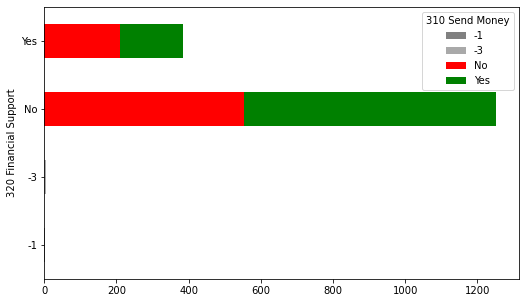

In [7]:
sbar(['310 Send Money', '320 Financial Support'], ['grey', 'darkgrey', 'red', 'green'])

## 334 Optimism

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
330 Change in Economic Status,,,,,
-1,3.0,0.0,0.0,0.0,0.0
-3,0.0,5.0,0.0,0.0,0.0
Better off economically than you are now,0.0,1.0,131.0,543.0,13.0
DK/RA (do not read),0.0,0.0,6.0,10.0,6.0
Has always lived in City Name (donâ€™t read),0.0,0.0,38.0,138.0,3.0
Not Applicable,0.0,0.0,8.0,44.0,7.0
The same,0.0,0.0,72.0,159.0,9.0
Worse off economically than you are now,0.0,0.0,106.0,332.0,10.0


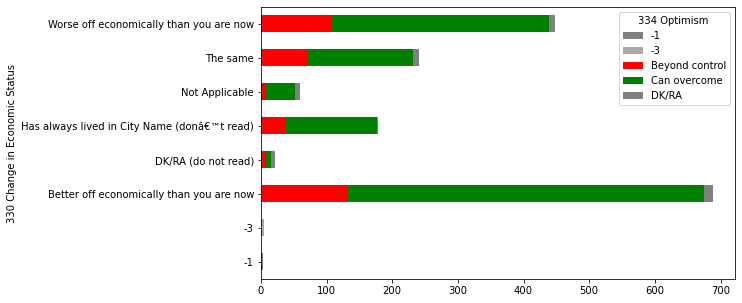

In [10]:
sbar(['334 Optimism ', '330 Change in Economic Status'], ['grey', 'darkgrey', 'red', 'green'])

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
331 Future Economic Status,,,,,
-1,3.0,0.0,0.0,0.0,0.0
-3,0.0,5.0,0.0,0.0,0.0
Dk/Ra (Do Not Read),0.0,0.0,58.0,65.0,8.0
Has Always Lived In City Name (Donâ€™T Read),0.0,0.0,49.0,159.0,5.0
No,0.0,0.0,63.0,94.0,7.0
Not Applicable,0.0,0.0,15.0,51.0,7.0
Yes,0.0,1.0,176.0,857.0,21.0


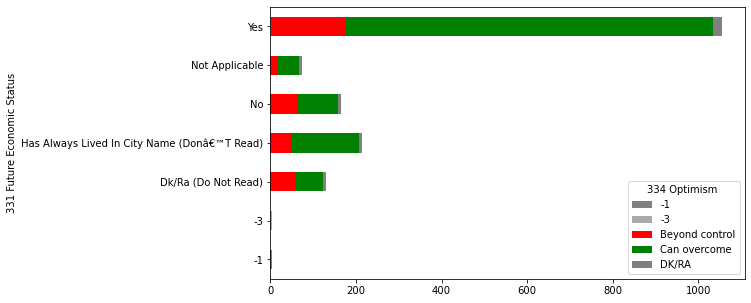

In [13]:
sbar(['334 Optimism ', '331 Future Economic Status'], ['grey', 'darkgrey', 'red', 'green'])

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
332 Economic Outlook,,,,,
-1,3.0,0.0,0.0,0.0,0.0
-3,0.0,5.0,0.0,0.0,0.0
Dk/Ra,0.0,0.0,7.0,10.0,4.0
No,0.0,0.0,105.0,588.0,25.0
Yes,0.0,1.0,249.0,628.0,19.0


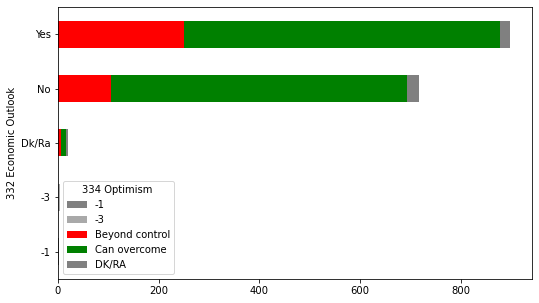

In [14]:
sbar(['334 Optimism ', '332 Economic Outlook'], ['grey', 'darkgrey', 'red', 'green'])

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
333 Outlook on Life,,,,,
-1,3.0,0.0,0.0,0.0,0.0
-3,0.0,5.0,0.0,0.0,0.0
Dk/Ra,0.0,0.0,14.0,36.0,12.0
No,0.0,0.0,46.0,364.0,16.0
Yes,0.0,1.0,301.0,826.0,20.0


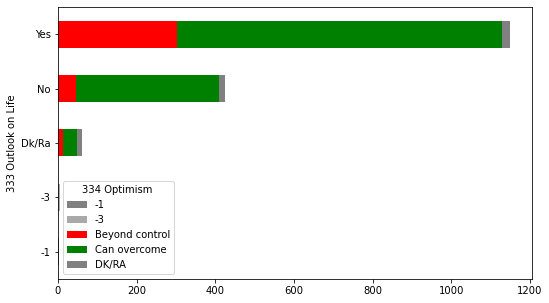

In [15]:
sbar(['334 Optimism ', '333 Outlook on Life'], ['grey', 'darkgrey', 'red', 'green'])

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
335 Adapted,,,,,
-1,3.0,0.0,0.0,0.0,0.0
-3,0.0,6.0,0.0,0.0,0.0
DK/RA,0.0,0.0,5.0,14.0,6.0
No,0.0,0.0,293.0,1006.0,34.0
Yes,0.0,0.0,63.0,206.0,8.0


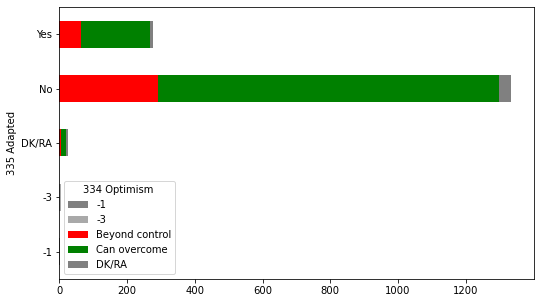

In [12]:
sbar(['334 Optimism ', '335 Adapted'], ['grey', 'darkgrey', 'red', 'green'])

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
205b Reason for leaving,,,,,
-1,2.0,4.0,290.0,1020.0,39.0
-3,1.0,0.0,0.0,0.0,0.0
Access to work,0.0,2.0,38.0,101.0,5.0
Cost of rent (too high& somewhere else much cheaper),0.0,0.0,3.0,11.0,0.0
Crime or insecurity,0.0,0.0,1.0,3.0,0.0
DK/RA,0.0,0.0,1.0,2.0,1.0
Education (for self or others),0.0,0.0,5.0,15.0,0.0
Evicted,0.0,0.0,1.0,2.0,0.0
Family reasons (unification / escape),0.0,0.0,12.0,32.0,1.0


<AxesSubplot:ylabel='205b Reason for leaving'>

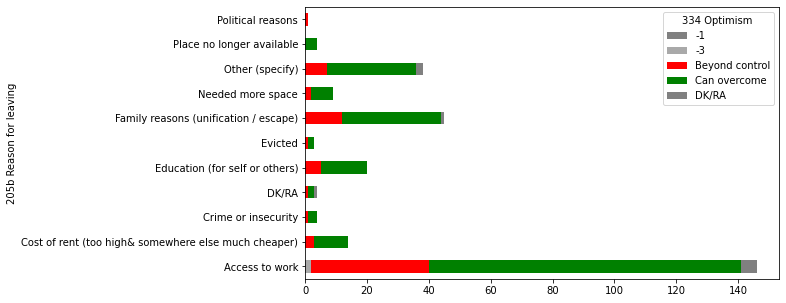

In [25]:
V = ['334 Optimism ', '205b Reason for leaving']

subset = survey[V]
subset['count'] = 1

counts = subset.groupby(V).count().reset_index().pivot(columns=V[0], index=V[1], values='count').fillna(0)
display(counts)

counts = counts.drop(axis='rows', labels=['-1', '-3']) #.drop(axis='columns', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True, color=['grey', 'darkgrey', 'red', 'green'],
            figsize=(8.5,5))

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
8 Identify City,,,,,
Accra,0.0,1.0,47.0,508.0,25.0
Johannesburg,0.0,1.0,138.0,365.0,11.0
Nairobi,3.0,4.0,176.0,353.0,12.0


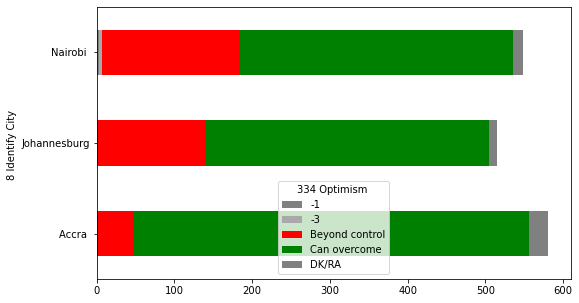

In [26]:
sbar(['334 Optimism ', '8 Identify City '], ['grey', 'darkgrey', 'red', 'green'])

334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
"100: Village, City or Town",,,,,
City,0.0,0.0,49.0,231.0,9.0
Town,1.0,4.0,107.0,507.0,23.0
Village,2.0,2.0,205.0,488.0,16.0


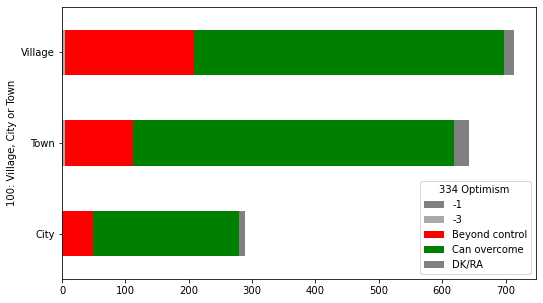

In [27]:
sbar(['334 Optimism ', '100: Village, City or Town'], ['grey', 'darkgrey', 'red', 'green'])

,334 Optimism,Trajectory,count
ID,,,
276785,-3,Town to Nairobi,1
276788,-1,Village to Nairobi,1
276802,Can overcome,Town to Nairobi,1
276814,-3,Village to Nairobi,1
276822,Beyond control,City to Nairobi,1
...,...,...,...
297661,Can overcome,City to Johannesburg,1
297663,Can overcome,Village to Johannesburg,1
297666,Can overcome,Village to Johannesburg,1


334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
Trajectory,,,,,
City to Accra,0.0,0.0,18.0,111.0,6.0
City to Johannesburg,0.0,0.0,23.0,100.0,2.0
City to Nairobi,0.0,0.0,8.0,20.0,1.0
Town to Accra,0.0,1.0,21.0,304.0,13.0
Town to Johannesburg,0.0,1.0,55.0,120.0,6.0
Town to Nairobi,1.0,2.0,31.0,83.0,4.0
Village to Accra,0.0,0.0,8.0,93.0,6.0
Village to Johannesburg,0.0,0.0,60.0,145.0,3.0
Village to Nairobi,2.0,2.0,137.0,250.0,7.0


334 Optimism,-1,-3,Beyond control,Can overcome,DK/RA
Trajectory,,,,,
City to Accra,0.0,0.0,18.0,111.0,6.0
City to Johannesburg,0.0,0.0,23.0,100.0,2.0
City to Nairobi,0.0,0.0,8.0,20.0,1.0
Town to Accra,0.0,1.0,21.0,304.0,13.0
Town to Johannesburg,0.0,1.0,55.0,120.0,6.0
Town to Nairobi,1.0,2.0,31.0,83.0,4.0
Village to Accra,0.0,0.0,8.0,93.0,6.0
Village to Johannesburg,0.0,0.0,60.0,145.0,3.0
Village to Nairobi,2.0,2.0,137.0,250.0,7.0


334 Optimism,Beyond control %,Can overcome %,Other %
Trajectory,,,
City to Accra,0.133333,0.821411,0.045256
City to Johannesburg,0.184000,0.798824,0.017176
City to Nairobi,0.275862,0.683157,0.040981
Town to Accra,0.061947,0.896591,0.041462
Town to Johannesburg,0.302198,0.658248,0.039555
Town to Nairobi,0.256198,0.684501,0.059301
Village to Accra,0.074766,0.868552,0.056682
Village to Johannesburg,0.288462,0.696150,0.015389
Village to Nairobi,0.344221,0.627598,0.028181


<AxesSubplot:ylabel='Trajectory'>

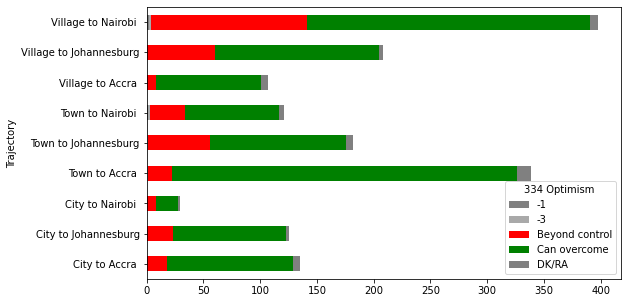

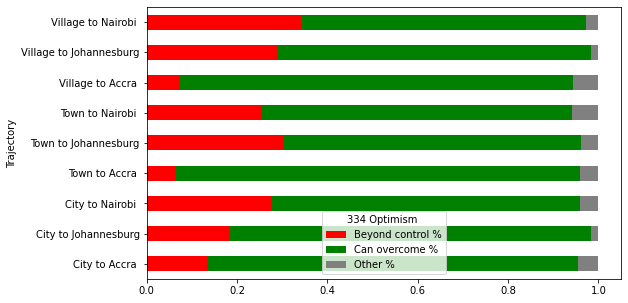

In [64]:
V = ['334 Optimism ', '100: Village, City or Town', '8 Identify City ']

subset = survey[V]
subset['count'] = 1
subset['Trajectory'] = subset['100: Village, City or Town'] + ' to ' + subset['8 Identify City ']
subset = subset[['334 Optimism ', 'Trajectory', 'count']]

display(subset)

counts = subset.groupby(['334 Optimism ', 'Trajectory']).count().reset_index().pivot(columns='334 Optimism ', index='Trajectory', values='count').fillna(0)
display(counts)

percents = counts.copy()
percents['Beyond control %'] = percents['Beyond control'] / percents.sum(axis=1)
percents['Can overcome %'] = percents['Can overcome'] / percents.sum(axis=1)
percents['Other %'] = 1 - percents['Beyond control %'] - percents['Can overcome %']
percents = percents[['Beyond control %', 'Can overcome %', 'Other %']]

display(counts)
display(percents)

#counts = counts.drop(axis='rows', labels=['-1', '-3']) #.drop(axis='columns', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True, color=['grey', 'darkgrey', 'red', 'green'],
            figsize=(8.5,5))

percents.plot(kind='barh', stacked=True, color=['red', 'green', 'grey'],
            figsize=(8.5,5))

## 700 Stay or go

,700 Stay or go,Trajectory,count
ID,,,
276785,-1,Town to Nairobi,1
276788,-1,Village to Nairobi,1
276802,Stay in country but move to another neighbourhood,Town to Nairobi,1
276814,-1,Village to Nairobi,1
276822,-1,City to Nairobi,1
...,...,...,...
297661,Stay in country but move to another neighbourhood,City to Johannesburg,1
297663,Stay here in neighbourhood,Village to Johannesburg,1
297666,Stay here in neighbourhood,Village to Johannesburg,1


700 Stay or go,-1,Leave the country,Stay here in neighbourhood,Stay in country but move to another neighbourhood
Trajectory,,,,
City to Accra,1.0,32.0,69.0,33.0
City to Johannesburg,3.0,13.0,84.0,25.0
City to Nairobi,5.0,3.0,13.0,8.0
Town to Accra,3.0,84.0,164.0,88.0
Town to Johannesburg,2.0,15.0,119.0,46.0
Town to Nairobi,5.0,30.0,60.0,26.0
Village to Accra,0.0,34.0,43.0,30.0
Village to Johannesburg,0.0,25.0,151.0,32.0
Village to Nairobi,12.0,39.0,292.0,55.0


700 Stay or go,Leave %,Stay Country %,Stay Neighborhood %,Other %
Trajectory,,,,
City to Accra,0.237037,0.243099,0.510215,0.009649
City to Johannesburg,0.104000,0.198767,0.671441,0.025792
City to Nairobi,0.103448,0.270726,0.446682,0.179143
Town to Accra,0.247788,0.259028,0.483422,0.009762
Town to Johannesburg,0.082418,0.251729,0.653550,0.012303
Town to Nairobi,0.247934,0.213565,0.494854,0.043647
Village to Accra,0.317757,0.278504,0.400679,0.003060
Village to Johannesburg,0.120192,0.153223,0.725542,0.001042
Village to Nairobi,0.097990,0.137903,0.733488,0.030619


<AxesSubplot:ylabel='Trajectory'>

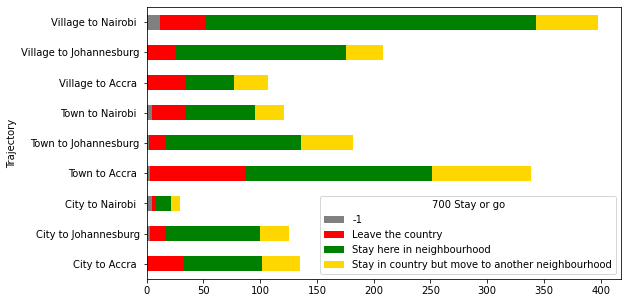

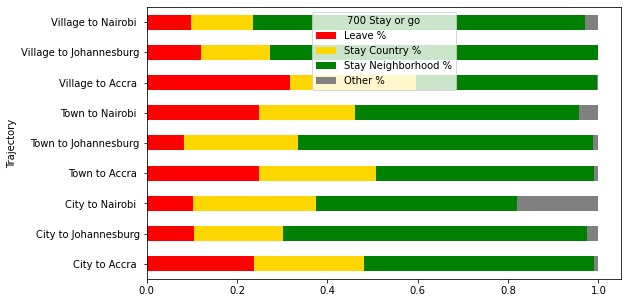

In [66]:
v = '700 Stay or go'

V = [v, '100: Village, City or Town', '8 Identify City ']

subset = survey[V]
subset['count'] = 1
subset['Trajectory'] = subset['100: Village, City or Town'] + ' to ' + subset['8 Identify City ']
subset = subset[[v, 'Trajectory', 'count']]

display(subset)

counts = subset.groupby([v, 'Trajectory']).count().reset_index().pivot(columns=v, index='Trajectory', values='count').fillna(0)

percents = counts.copy()
percents['Leave %'] = percents['Leave the country'] / percents.sum(axis=1)
percents['Stay Neighborhood %'] = percents['Stay here in neighbourhood'] / percents.sum(axis=1)
percents['Stay Country %'] = percents['Stay in country but move to another neighbourhood'] / percents.sum(axis=1)
percents['Other %'] = 1 - percents['Leave %'] - percents['Stay Neighborhood %'] - percents['Stay Country %']
percents = percents[['Leave %', 'Stay Country %', 'Stay Neighborhood %',  'Other %']]

display(counts)
display(percents)

#counts = counts.drop(axis='rows', labels=['-1', '-3']) #.drop(axis='columns', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True, color=['grey', 'red', 'green', 'gold'],
            figsize=(8.5,5))

percents.plot(kind='barh', stacked=True, color=['red', 'gold', 'green', 'grey'],
            figsize=(8.5,5))

## 226 COVID Impact on Mobility

,226 COVID Impact on Mobility,Trajectory,count
ID,,,
276785,No,Town to Nairobi,1
276788,-3,Village to Nairobi,1
276802,No,Town to Nairobi,1
276814,No,Village to Nairobi,1
276822,No,City to Nairobi,1
...,...,...,...
297661,No,City to Johannesburg,1
297663,No,Village to Johannesburg,1
297666,No,Village to Johannesburg,1


226 COVID Impact on Mobility,-1,-3,No,Yes
Trajectory,,,,
City to Accra,0.0,0.0,125.0,10.0
City to Johannesburg,0.0,0.0,120.0,5.0
City to Nairobi,0.0,0.0,25.0,4.0
Town to Accra,0.0,0.0,311.0,28.0
Town to Johannesburg,0.0,0.0,174.0,8.0
Town to Nairobi,0.0,0.0,105.0,16.0
Village to Accra,0.0,0.0,94.0,13.0
Village to Johannesburg,0.0,0.0,200.0,8.0
Village to Nairobi,1.0,1.0,354.0,42.0


226 COVID Impact on Mobility,No %,Yes %,Other %
Trajectory,,,
City to Accra,0.925926,0.073569,0.000505
City to Johannesburg,0.960000,0.039695,0.000305
City to Nairobi,0.862069,0.133949,0.003982
Town to Accra,0.917404,0.082373,0.000223
Town to Johannesburg,0.956044,0.043726,0.000230
Town to Nairobi,0.867769,0.131290,0.000942
Village to Accra,0.878505,0.120506,0.000989
Village to Johannesburg,0.961538,0.038285,0.000177
Village to Nairobi,0.889447,0.105292,0.005260


<AxesSubplot:ylabel='Trajectory'>

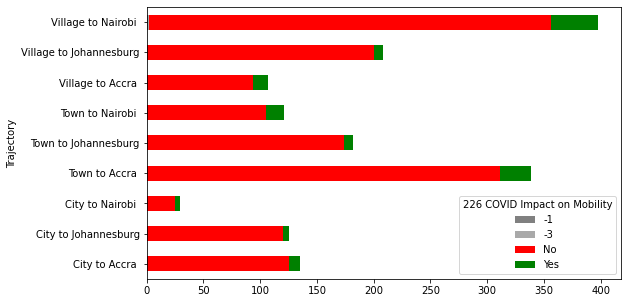

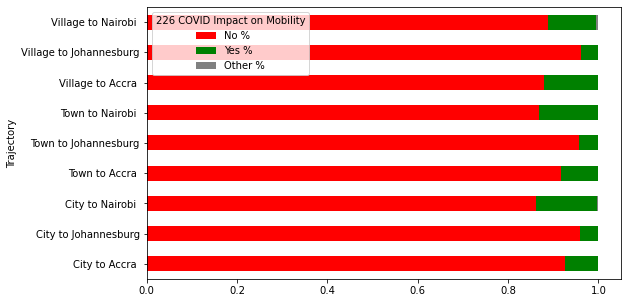

In [59]:
v = '226 COVID Impact on Mobility'

V = [v, '100: Village, City or Town', '8 Identify City ']

subset = survey[V]
subset['count'] = 1
subset['Trajectory'] = subset['100: Village, City or Town'] + ' to ' + subset['8 Identify City ']
subset = subset[[v, 'Trajectory', 'count']]

display(subset)

counts = subset.groupby([v, 'Trajectory']).count().reset_index().pivot(columns=v, index='Trajectory', values='count').fillna(0)

percents = counts.copy()
percents['No %'] = percents['No'] / percents.sum(axis=1)
percents['Yes %'] = percents['Yes'] / percents.sum(axis=1)
percents['Other %'] = 1 - percents['No %'] - percents['Yes %']
percents = percents[['No %', 'Yes %', 'Other %']]

display(counts)
display(percents)

#counts = counts.drop(axis='rows', labels=['-1', '-3']) #.drop(axis='columns', labels=['-1', '-3'])

counts.plot(kind='barh', stacked=True, color=['grey', 'darkgrey', 'red', 'green', 'gold'],
            figsize=(8.5,5))

percents.plot(kind='barh', stacked=True, color=['red', 'green', 'grey'],
            figsize=(8.5,5))

In [49]:
counts.groupby('Trajectory').count.transform('sum') * 100

AttributeError: 'function' object has no attribute 'transform'

In [5]:
survey

,SITE_CODE,TARGET_LATITUDE,TARGET_LONGITUDE,SITE_LATITUDE,SITE_LONGITUDE,SURVEY DURATION IN MINUTES,DATE_UPLOADED,3 Migrant,4 Gender,4 Other Gender,...,236 Current Residence,Migrant Quota Category,237 Returned,238 Places Returned To,Unnamed: 326,Unnamed: 327,Unnamed: 328,Unnamed: 329,Unnamed: 330,Unnamed: 331
ID,,,,,,,,,,,,,,,,,,,,,
276785,276785,-1.21003,36.78920,-1.28892,36.80449,139.96,3/4/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
276788,276788,-1.21010,36.78923,-1.28872,36.80430,74.59,3/4/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
276802,276802,-1.21010,36.78923,-1.28884,36.80433,244.90,3/5/21,Yes,Male,-1,...,One year exactly or/More than a year,New Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
276814,276814,-1.20987,36.78899,-1.28885,36.80435,125.87,3/4/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,Nakuru^1^~Kisumu^2^,NaN,NaN,NaN,NaN,NaN,NaN
276822,276822,-1.20976,36.78888,-1.28873,36.80428,80.18,3/4/21,Yes,Female,-1,...,One year exactly or/More than a year,New Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,297661,-26.18491,28.05547,-26.18380,28.05302,62.78,4/16/21,Yes,Female,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
297663,297663,-26.18395,28.05459,-26.18328,28.05690,73.30,4/16/21,No,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
297666,297666,-26.18565,28.05295,-26.18387,28.05308,72.04,4/16/21,No,Male,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,Yeoville^4^~Bloemfontein^2^,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
survey[['100: Village, City or Town', '8 Identify City ']]

,"100: Village, City or Town",8 Identify City
ID,,
276785,Town,Nairobi
276788,Village,Nairobi
276802,Town,Nairobi
276814,Village,Nairobi
276822,City,Nairobi
...,...,...
297661,City,Johannesburg
297663,Village,Johannesburg
297666,Village,Johannesburg


In [18]:
accra_ids = survey[survey['8 Identify City '].eq('Accra ')]

display(accra_ids) 
display(accra_ids['8 Identify City '])
accra_ids.index

,SITE_CODE,TARGET_LATITUDE,TARGET_LONGITUDE,SITE_LATITUDE,SITE_LONGITUDE,SURVEY DURATION IN MINUTES,DATE_UPLOADED,3 Migrant,4 Gender,4 Other Gender,...,236 Current Residence,Migrant Quota Category,237 Returned,238 Places Returned To,Unnamed: 326,Unnamed: 327,Unnamed: 328,Unnamed: 329,Unnamed: 330,Unnamed: 331
ID,,,,,,,,,,,,,,,,,,,,,
277933,277933,5.65003,-0.19394,5.63666,-0.18040,311.23,3/6/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
278053,278053,5.64907,-0.19409,5.63870,-0.17833,291.01,3/7/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
278067,278067,5.64980,-0.19092,5.63665,-0.18040,289.21,3/7/21,Yes,Female,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,-3,NaN,NaN,NaN,NaN,NaN,NaN
278076,278076,5.65003,-0.19394,5.69919,-0.16976,209.03,3/7/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
278077,278077,5.70639,-0.16915,5.70634,-0.16909,2229.94,3/7/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290682,290682,5.66749,-0.15784,5.67016,-0.16235,61.79,3/31/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
290683,290683,5.54373,-0.22518,5.54529,-0.22479,60.26,3/31/21,No,Male,-1,...,More than 8 years,Long-Term Resident,Yes& I Have,Kuje ^3^~Abuja ^2^,NaN,NaN,NaN,NaN,NaN,NaN
290686,290686,5.67226,-0.15250,5.68597,-0.16912,66.39,3/31/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN


ID
277933    Accra 
278053    Accra 
278067    Accra 
278076    Accra 
278077    Accra 
           ...  
290682    Accra 
290683    Accra 
290686    Accra 
290687    Accra 
290689    Accra 
Name: 8 Identify City , Length: 581, dtype: object

Int64Index([277933, 278053, 278067, 278076, 278077, 278081, 278084, 278086,
            278087, 278386,
            ...
            290671, 290677, 290678, 290679, 290680, 290682, 290683, 290686,
            290687, 290689],
           dtype='int64', name='ID', length=581)

In [20]:
accra_orig = orig[orig.index.isin(accra_ids.index)]
display(accra_orig)

accra_curL = curL[curL.index.isin(accra_ids.index)]
display(accra_curL)

,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,distance_from_properties_owned_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
respondentID,,,,,,,,,,,,,,,,,,,,,
278077,1966,55,0.0,581.0,"('Ejisu', 'Kumasi', 'Ghana')",origin,"(6.7163307, -1.5009105)",0.0,0.0,NaN,...,Spare Parts Dealer,200.0,Yes,1,0.0,0.0,0.0,0.0,6.716331,-1.500911
278081,1983,38,NaN,NaN,"('Surelere', 'Lagos', 'Nigeria')",origin,NaN,NaN,NaN,NaN,...,Dealer In Glasses For Designing Doors And Windows,300.0,Yes,2,NaN,NaN,NaN,NaN,NaN,NaN
278084,-3,2024,NaN,NaN,NaN,origin,NaN,NaN,NaN,NaN,...,Trading,NaN,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
278086,1977,44,0.0,61.0,"('Kokomlemle', 'Accra', 'Ghana')",origin,"(5.5755147, -0.20887310000000003)",0.0,0.0,NaN,...,Trade In Textiles,500.0,Yes,-3,0.0,0.0,0.0,0.0,5.575515,-0.208873
278087,1983,38,NaN,NaN,NaN,origin,NaN,NaN,NaN,NaN,...,Footballer,100.0,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290650,1979,42,NaN,NaN,"('Suuru', 'Birnin Kebbi', 'Nigeria')",origin,NaN,NaN,NaN,NaN,...,Butcher But Import Livestock From Niger,400.0,Yes,-3,NaN,NaN,NaN,NaN,NaN,NaN
290651,1990,31,NaN,NaN,"('Atakpamã©', 'Kpalime', 'Togo')",origin,NaN,NaN,NaN,NaN,...,Mechanic,30000.0,Yes,-3,NaN,NaN,NaN,NaN,NaN,NaN
290670,1985,36,0.0,300.0,"('Ejigbo', 'Lagos', 'Nigeria')",origin,"(6.5507230000000005, 3.3067225)",0.0,0.0,NaN,...,Own A Big Electronic Shop,500.0,No,-1,0.0,0.0,0.0,0.0,6.550723,3.306722


,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,distance_from_properties_owned_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
respondentID,,,,,,,,,,,,,,,,,,,,,
278077,1966,55,671.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",186.387383,1.954785,NaN,...,Spare Parts Dealer,200.0,Yes,1,1.954785,1.965516,186.387383,186.635719,5.686496,-0.167705
278081,1983,38,0.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",0.000000,0.000000,NaN,...,Dealer In Glasses For Designing Doors And Windows,300.0,Yes,2,0.000000,0.000000,0.000000,0.000000,5.686496,-0.167705
278084,-3,2024,0.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",0.000000,0.000000,NaN,...,Trading,NaN,Yes,0,0.000000,0.000000,0.000000,0.000000,5.686496,-0.167705
278086,1977,44,61.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",13.092930,13.092930,NaN,...,Trade In Textiles,500.0,Yes,-3,13.092930,13.154605,13.092930,13.154605,5.686496,-0.167705
278087,1983,38,0.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",0.000000,0.000000,NaN,...,Footballer,100.0,No,-1,0.000000,0.000000,0.000000,0.000000,5.686496,-0.167705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290651,1990,31,0.0,0.0,"('Old Fadama', 'Accra', 'Ghana')",current location,"(5.5488671, -0.22252159999999999)",0.000000,0.000000,NaN,...,Mechanic,30000.0,Yes,-3,0.000000,0.000000,0.000000,0.000000,5.548867,-0.222522
290670,1985,36,427.0,0.0,"('Old Fadama', 'Accra', 'Ghana')",current location,"(5.5488671, -0.22252159999999999)",406.099628,0.000000,NaN,...,Own A Big Electronic Shop,500.0,No,-1,0.000000,0.000000,406.099628,405.832499,5.548867,-0.222522
290678,1972,49,0.0,0.0,"('James Town', 'Accra', 'Ghana')",current location,"(5.535796599999999, -0.21036370000000001)",0.000000,0.000000,NaN,...,Contractor,NaN,Yes,2,0.000000,0.000000,0.000000,0.000000,5.535797,-0.210364


In [43]:
A = accra_curL[['distance_from_origin_location_km', 'location_name', 'location_latlon']]
B = accra_orig[['location_name', 'location_latlon']]

accra_OD = A.join(B, how='inner', lsuffix='_O', rsuffix='_D').sort_values('distance_from_origin_location_km', ascending=False)
accra_OD = accra_OD[~(accra_OD['distance_from_origin_location_km'].eq(0))].dropna(axis='rows', subset=['location_latlon_D'])
accra_OD

,distance_from_origin_location_km,location_name_O,location_latlon_O,location_name_D,location_latlon_D
respondentID,,,,,
282623,13164.817731,"('Madina', 'Accra', 'Ghana')","(5.6864962, -0.16770520000000003)","('Kasama', 'Ziguinchor', 'Senegal')","(14.6027831, 121.0050491)"
288542,8636.687459,"('Madina', 'Accra', 'Ghana')","(5.6864962, -0.16770520000000003)","('Mile 25', 'Abakaliki', 'Nigeria')","(-33.0257159, -71.47651979999999)"
284149,2043.354639,"('Madina', 'Accra', 'Ghana')","(5.6864962, -0.16770520000000003)","('Imo State', 'Anarba State', 'Ghana')","(-4.3125032999999995, 15.2893612)"
289117,1636.406244,"('Madina', 'Accra', 'Ghana')","(5.6864962, -0.16770520000000003)","('Diffa', 'Niamey', 'Niger')","(13.313074900000002, 12.6136611)"
289525,1542.947991,"('Old Fadama', 'Accra', 'Ghana')","(5.5488671, -0.22252159999999999)","('Goudoumaria', 'Diffa', 'Niger')","(13.710699499999999, 11.188533900000001)"
...,...,...,...,...,...
288712,3.001162,"('James Town', 'Accra', 'Ghana')","(5.535796599999999, -0.21036370000000001)","('Chorkor', 'Accra', 'Ghana')","(5.5273187, -0.23609339999999998)"
287259,3.001162,"('James Town', 'Accra', 'Ghana')","(5.535796599999999, -0.21036370000000001)","('Chorkor', 'Accra', 'Ghana')","(5.5273187, -0.23609339999999998)"
287404,1.975834,"('James Town', 'Accra', 'Ghana')","(5.535796599999999, -0.21036370000000001)","('Fadaman', 'Accra', 'Ghana')","(5.5488671, -0.22252159999999999)"


In [42]:
accra_OD['distance_from_origin_location_km']

,distance_from_origin_location_km,location_name_O,location_latlon_O,location_name_D,location_latlon_D
0,160.874430,"('Madina', 'Accra', 'Ghana')","(5.6864962, -0.16770520000000003)","('Lome', 'Lome', 'Togo')","(5.861010299999999, -0.657934)"
1,844.692547,NaN,NaN,NaN,"(6.130419, 1.215829)"
2,NaN,NaN,NaN,NaN,"(6.5536094, 7.4143061)"
3,NaN,NaN,NaN,NaN,"(9.4051992, -0.8423985999999999)"


In [44]:
accra_OD.to_csv('230924_Ghana_OD.csv')

In [50]:
traj[traj.respondentID.eq(282623)]

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
282623.00,282623,1986,35,0.0,360.0,"('Kasama', 'Ziguinchor', 'Senegal')",origin,"(14.6027831, 121.0050491)",0.000000,0.000000,...,Same Work,700.0,Yes,0,0.000000,0.000000,0.000000,0.000000,14.602783,121.005049
282623.01,282623,1986,35,360.0,27.0,"('Awoshie', 'Accra', 'Ghana')",1st migration location,"(5.5872779999999995, -0.2780901)",13180.059986,13180.059986,...,Same Work,700.0,Yes,0,13180.059986,13165.031736,13180.059986,13165.031736,5.587278,-0.278090
282623.02,282623,1986,35,NaN,NaN,"('Saasabi', 'Accra', 'Ghana')",2nd migration location,NaN,NaN,NaN,...,Same Work,700.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
282623.03,282623,1986,35,NaN,NaN,NaN,3rd migration location,NaN,NaN,NaN,...,Same Work,700.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
282623.04,282623,1986,35,NaN,NaN,NaN,4th migration location,NaN,NaN,NaN,...,Same Work,700.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
282623.05,282623,1986,35,387.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",13164.817731,16.429647,...,Same Work,700.0,Yes,0,16.429647,16.459696,13164.817731,13149.786773,5.686496,-0.167705
282623.06,282623,1986,35,436.0,49.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",13164.817731,0.000000,...,Same Work,700.0,Yes,0,0.000000,0.000000,13164.817731,13149.786773,5.686496,-0.167705
282623.07,282623,1986,35,442.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,Same Work,700.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN
282623.08,282623,1986,35,460.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,Same Work,700.0,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
traj[traj.respondentID.eq(288542)]

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
288542.00,288542,1998,23,0.0,209.0,"('Mile 25', 'Abakaliki', 'Nigeria')",origin,"(-33.0257159, -71.47651979999999)",0.000000,0.000000,...,Sale 0F Car Spare Parts,NaN,No,-1,0.000000,0.000000,0.000000,0.000000,-33.025716,-71.476520
288542.01,288542,1998,23,209.0,8.0,"('Mile 2', 'Lagos', 'Nigeria')",1st migration location,"(6.76194015, 3.2653968360756123)",9015.715837,9015.715837,...,Sale 0F Car Spare Parts,NaN,No,-1,9015.715837,9016.446840,9015.715837,9016.446840,6.761940,3.265397
288542.02,288542,1998,23,217.0,38.0,"('Madina', 'Accra', 'Ghana')",2nd migration location,"(5.6864962, -0.16770520000000003)",8636.687459,398.106660,...,Sale 0F Car Spare Parts,NaN,No,-1,398.106660,397.883136,8636.687459,8637.689732,5.686496,-0.167705
288542.03,288542,1998,23,NaN,NaN,NaN,3rd migration location,NaN,NaN,NaN,...,Sale 0F Car Spare Parts,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
288542.04,288542,1998,23,NaN,NaN,NaN,4th migration location,NaN,NaN,NaN,...,Sale 0F Car Spare Parts,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
288542.05,288542,1998,23,255.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",8636.687459,0.000000,...,Sale 0F Car Spare Parts,NaN,No,-1,0.000000,0.000000,8636.687459,8637.689732,5.686496,-0.167705
288542.06,288542,1998,23,293.0,38.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",8636.687459,0.000000,...,Sale 0F Car Spare Parts,NaN,No,-1,0.000000,0.000000,8636.687459,8637.689732,5.686496,-0.167705
288542.07,288542,1998,23,299.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,Sale 0F Car Spare Parts,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
288542.08,288542,1998,23,317.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,Sale 0F Car Spare Parts,NaN,No,-1,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
traj[traj.respondentID.eq(284149)]

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
284149.00,284149,1983,38,0.0,240.0,"('Imo State', 'Anarba State', 'Ghana')",origin,"(-4.3125032999999995, 15.2893612)",0.000000,0.000000,...,15,200.0,Yes,3,0.000000,0.000000,0.000000,0.000000,-4.312503,15.289361
284149.01,284149,1983,38,240.0,48.0,"('Gombe', 'Imo State', 'Ghana')",1st migration location,"(9.04256615, 7.482005489275561)",1712.207753,1712.207753,...,15,200.0,Yes,3,1712.207753,1718.787785,1712.207753,1718.787785,9.042566,7.482005
284149.02,284149,1983,38,288.0,130.0,"('Abuja', 'Abuja', 'Ghana')",2nd migration location,"(5.6864962, -0.16770520000000003)",2043.354639,922.414600,...,15,200.0,Yes,3,922.414600,922.323509,2043.354639,2045.079053,5.686496,-0.167705
284149.03,284149,1983,38,NaN,NaN,"('Bayas', 'Accra', 'Ghana')",3rd migration location,NaN,NaN,NaN,...,15,200.0,Yes,3,NaN,NaN,NaN,NaN,NaN,NaN
284149.04,284149,1983,38,NaN,NaN,"('Madina', 'Accra', 'Ghana')",4th migration location,NaN,NaN,NaN,...,15,200.0,Yes,3,NaN,NaN,NaN,NaN,NaN,NaN
284149.05,284149,1983,38,418.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",2043.354639,0.000000,...,15,200.0,Yes,3,0.000000,0.000000,2043.354639,2045.079053,5.686496,-0.167705
284149.06,284149,1983,38,574.0,156.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",2043.354639,0.000000,...,15,200.0,Yes,3,0.000000,0.000000,2043.354639,2045.079053,5.686496,-0.167705
284149.07,284149,1983,38,580.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,15,200.0,Yes,3,NaN,NaN,NaN,NaN,NaN,NaN
284149.08,284149,1983,38,598.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,15,200.0,Yes,3,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
traj[traj.respondentID.eq(289117)]

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
289117.00,289117,1989,32,0.0,576.0,"('Diffa', 'Niamey', 'Niger')",origin,"(13.313074900000002, 12.6136611)",0.000000,0.000000,...,Trade,NaN,Yes,2,0.000000,0.000000,0.000000,0.000000,13.313075,12.613661
289117.01,289117,1989,32,576.0,48.0,"('Mamprobi', 'Accra', 'Ghana')",1st migration location,"(5.5356856, -0.24027310000000002)",1652.082214,1652.082214,...,Trade,NaN,Yes,2,1652.082214,1653.016888,1652.082214,1653.016888,5.535686,-0.240273
289117.02,289117,1989,32,624.0,48.0,"('Kasoa', 'Accra', 'Ghana')",2nd migration location,"(5.532573, -0.43749099999999996)",1670.775636,21.855257,...,Trade,NaN,Yes,2,21.855257,21.830189,1670.775636,1671.657246,5.532573,-0.437491
289117.03,289117,1989,32,672.0,96.0,"('Madina', 'Accra', 'Ghana')",3rd migration location,"(5.6864962, -0.16770520000000003)",1636.406244,34.396497,...,Trade,NaN,Yes,2,34.396497,34.413261,1636.406244,1637.271130,5.686496,-0.167705
289117.04,289117,1989,32,NaN,NaN,NaN,4th migration location,NaN,NaN,NaN,...,Trade,NaN,Yes,2,NaN,NaN,NaN,NaN,NaN,NaN
289117.05,289117,1989,32,768.0,0.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",1636.406244,0.000000,...,Trade,NaN,Yes,2,0.000000,0.000000,1636.406244,1637.271130,5.686496,-0.167705
289117.06,289117,1989,32,864.0,96.0,"('Madina', 'Accra', 'Ghana')",current location,"(5.6864962, -0.16770520000000003)",1636.406244,0.000000,...,Trade,NaN,Yes,2,0.000000,0.000000,1636.406244,1637.271130,5.686496,-0.167705
289117.07,289117,1989,32,870.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,Trade,NaN,Yes,2,NaN,NaN,NaN,NaN,NaN,NaN
289117.08,289117,1989,32,888.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,Trade,NaN,Yes,2,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
traj[traj.respondentID.eq(289525)]

,respondentID,birthyear,age,duration,interval,location_name,location_type,location_latlon,distance_from_origin_location_km,distance_from_previous_location_km,...,work_aspiration,financial_support,children,children_since_leaving,p_kmGeo,p_kmGrC,O_kmGeo,O_kmGrC,lat,lon
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
289525.00,289525,1980,41,0.0,240.0,"('Goudoumaria', 'Diffa', 'Niger')",origin,"(13.710699499999999, 11.188533900000001)",0.000000,0.000000,...,Self Employed,NaN,Yes,1,0.000000,0.000000,0.000000,0.000000,13.710700,11.188534
289525.01,289525,1980,41,240.0,62.0,"('Bawku', 'Bolgatanga', 'Ghana')",1st migration location,"(11.0607602, -0.24228760000000002)",1276.932675,1276.932675,...,Self Employed,NaN,Yes,1,1276.932675,1275.741950,1276.932675,1275.741950,11.060760,-0.242288
289525.02,289525,1980,41,302.0,73.0,"('Kintampo', 'Techiman', 'Ghana')",2nd migration location,"(8.053714, -1.7289189999999999)",1544.014705,370.472462,...,Self Employed,NaN,Yes,1,370.472462,371.979322,1544.014705,1543.750844,8.053714,-1.728919
289525.03,289525,1980,41,375.0,42.0,"('Suame', 'Kumasi', 'Ghana')",3rd migration location,"(6.7163628, -1.6369204)",1603.217926,148.249567,...,Self Employed,NaN,Yes,1,148.249567,149.052509,1603.217926,1603.688870,6.716363,-1.636920
289525.04,289525,1980,41,417.0,25.0,"('Madina', 'Adenta', 'Ghana')",4th migration location,"(5.6864962, -0.16770520000000003)",1529.017731,198.518221,...,Self Employed,NaN,Yes,1,198.518221,198.724268,1529.017731,1530.527642,5.686496,-0.167705
289525.05,289525,1980,41,442.0,0.0,"('Old Fadama', 'Accra', 'Ghana')",current location,"(5.5488671, -0.22252159999999999)",1542.947991,16.386608,...,Self Employed,NaN,Yes,1,16.386608,16.462060,1542.947991,1544.529011,5.548867,-0.222522
289525.06,289525,1980,41,523.0,81.0,"('Old Fadama', 'Accra', 'Ghana')",current location,"(5.5488671, -0.22252159999999999)",1542.947991,0.000000,...,Self Employed,NaN,Yes,1,0.000000,0.000000,1542.947991,1544.529011,5.548867,-0.222522
289525.07,289525,1980,41,529.0,6.0,NaN,aspiration 2-6 months,NaN,NaN,NaN,...,Self Employed,NaN,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN
289525.08,289525,1980,41,547.0,18.0,NaN,planned move 2 yrs,NaN,NaN,NaN,...,Self Employed,NaN,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN
